# Calibration Analysis

- [Parameters](#Parameters)
- [Data Loading](#Data-Loading)
- [Summary Statistics](#Summary-Statistics)
- [Visualizations](#Visualizations)
- [Best/Worst Cases](#Best-Worst-Cases)
- [Environment Info](#Environment-Info)

In [14]:
import os
import pandas as pd

# Parameters
date = '2020-01-02'
detector = 'e2w_in'
number = 0
project_root = os.environ["HORNSGATAN_HOME"]

if number > 0:
    postfix = f"{detector}_{date}_{number}"
else:
    postfix = f"{detector}_{date}"

data_path = os.path.join(project_root, "data/calibration_data", f"calibrated_data_{postfix}.csv")
print("Data path:", data_path)

Data path: /home/kaveh/projects/Hornsgatan/data/calibration_data/calibrated_data_e2w_in_2020-01-02.csv


In [15]:
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print("Loaded data:", df.shape)
else:
    raise FileNotFoundError(f"File not found: {data_path}")
df.head()

Loaded data: (9481, 10)


,veh_id,time_detector_sim,speed_detector_sim,speed_factor,time_detector_real,depart,departSpeed,speed_detector_real,delta_time,delta_speed
0,0_e2w_in,1.577923e+09,13.328000,1.60,1577923226,1577923208,max,13.333333,-0.27,-0.005333
1,1_e2w_in,1.577923e+09,11.661995,1.40,1577923230,1577923210,max,11.944444,0.26,-0.282450
2,2_e2w_in,1.577923e+09,10.412498,1.25,1577923233,1577923211,max,8.888889,1.10,1.523609
3,3_e2w_in,1.577923e+09,10.412500,1.25,1577923235,1577923213,max,8.888889,0.95,1.523611
4,4_e2w_in,1.577923e+09,10.829001,1.30,1577923237,1577923214,max,8.611111,0.44,2.217890


In [16]:
# Show summary stats for error columns
error_cols = ["delta_time", "delta_speed"]
df[error_cols].describe()

,delta_time,delta_speed
count,9481.000000,9481.000000
mean,0.208425,0.489403
std,0.757459,0.965306
min,-5.710000,-2.634403
25%,-0.220000,-0.142056
50%,0.010000,0.134722
75%,0.430000,0.829000
max,7.160000,8.231639


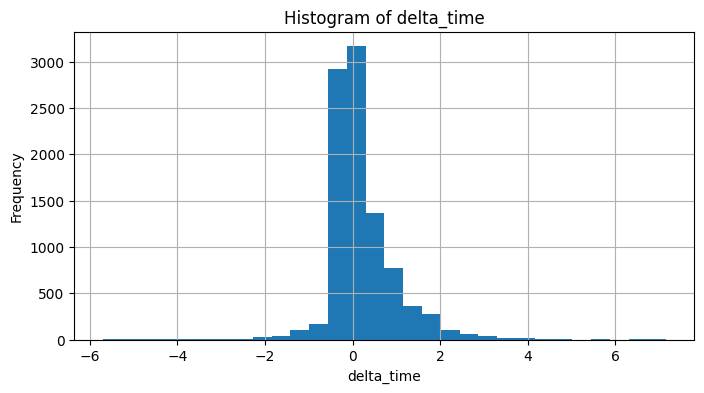

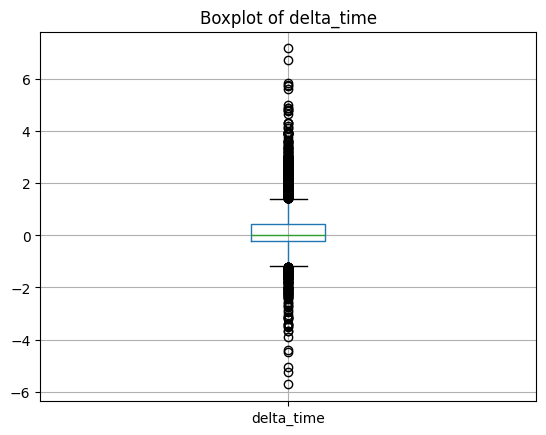

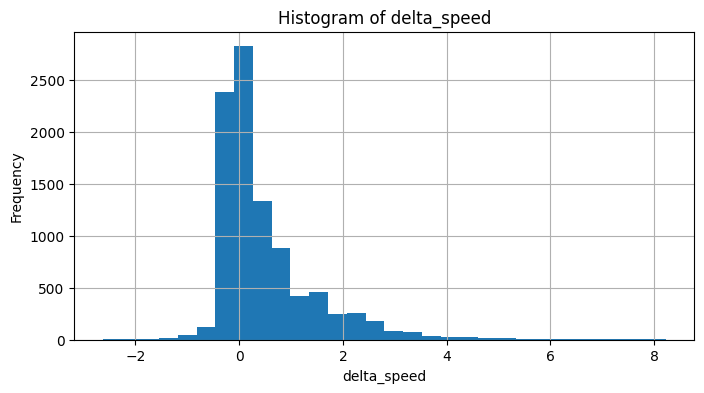

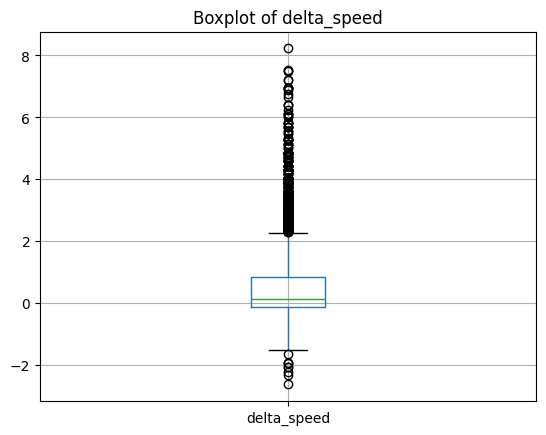

In [17]:
import matplotlib.pyplot as plt

for col in error_cols:
    plt.figure(figsize=(8,4))
    df[col].hist(bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [18]:
# Show rows with smallest/largest delta_time
print("Smallest delta_time:")
display(df.nsmallest(5, "delta_time"))
print("Largest delta_time:")
display(df.nlargest(5, "delta_time"))

Smallest delta_time:


,veh_id,time_detector_sim,speed_detector_sim,speed_factor,time_detector_real,depart,departSpeed,speed_detector_real,delta_time,delta_speed
4860,4860_e2w_in,1.577974e+09,9.579501,1.15,1577973523,1577973487,max,8.888889,-5.71,0.690612
2508,2508_e2w_in,1.577959e+09,8.330000,1.00,1577959272,1577959235,max,9.722222,-5.24,-1.392222
4811,4811_e2w_in,1.577973e+09,10.398756,1.95,1577973320,1577973293,max,8.333333,-5.04,2.065423
4946,4946_e2w_in,1.577974e+09,9.786722,1.85,1577973898,1577973867,max,6.666667,-4.49,3.120056
4399,4399_e2w_in,1.577971e+09,9.505356,3.20,1577971164,1577971144,max,10.277778,-4.40,-0.772421


Largest delta_time:


,veh_id,time_detector_sim,speed_detector_sim,speed_factor,time_detector_real,depart,departSpeed,speed_detector_real,delta_time,delta_speed
5358,5358_e2w_in,1.577976e+09,11.662001,1.4,1577975611,1577975597,max,5.555556,7.16,6.106446
5360,5360_e2w_in,1.577976e+09,12.431646,2.1,1577975614,1577975599,max,5.555556,6.70,6.876091
5356,5356_e2w_in,1.577976e+09,12.495000,1.5,1577975608,1577975594,max,6.666667,5.83,5.828333
3593,3593_e2w_in,1.577967e+09,12.495000,1.5,1577966832,1577966818,max,7.777778,5.74,4.717222
5359,5359_e2w_in,1.577976e+09,13.328000,1.6,1577975612,1577975598,max,6.111111,5.70,7.216889


1. Distribution Plots (Seaborn)

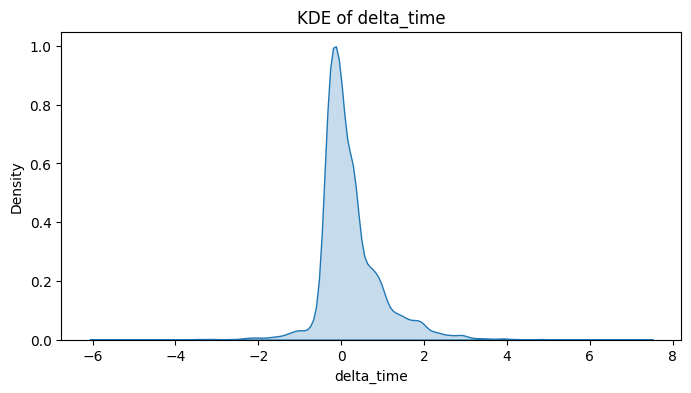

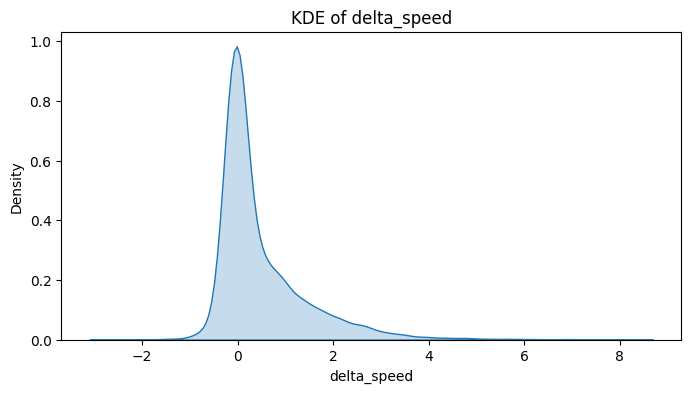

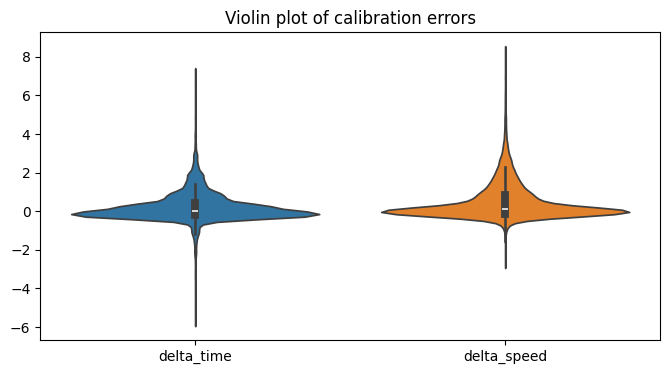

In [19]:
import seaborn as sns

# KDE plot for delta_time and delta_speed
for col in error_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

# Violin plot
plt.figure(figsize=(8,4))
sns.violinplot(data=df[error_cols])
plt.title("Violin plot of calibration errors")
plt.show()

2. Scatter Plot: Simulated vs. Real Values


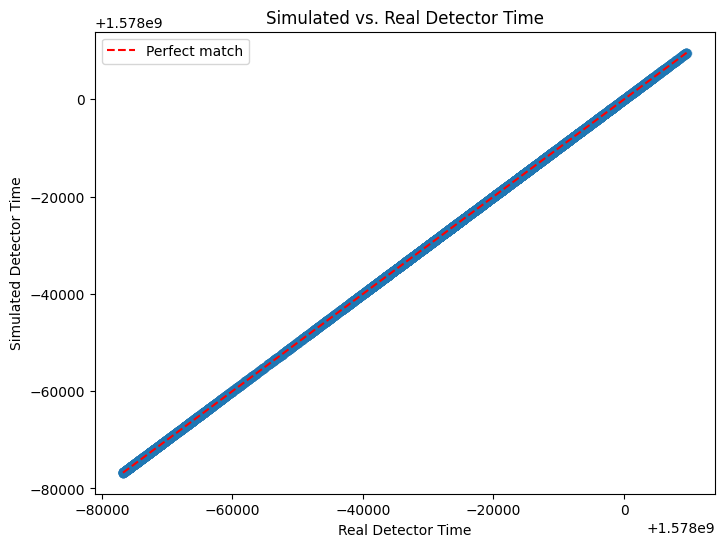

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df['time_detector_real'], df['time_detector_sim'], alpha=0.5)
plt.plot([df['time_detector_real'].min(), df['time_detector_real'].max()],
         [df['time_detector_real'].min(), df['time_detector_real'].max()],
         'r--', label='Perfect match')
plt.xlabel('Real Detector Time')
plt.ylabel('Simulated Detector Time')
plt.title('Simulated vs. Real Detector Time')
plt.legend()
plt.show()

3. Error Over Time


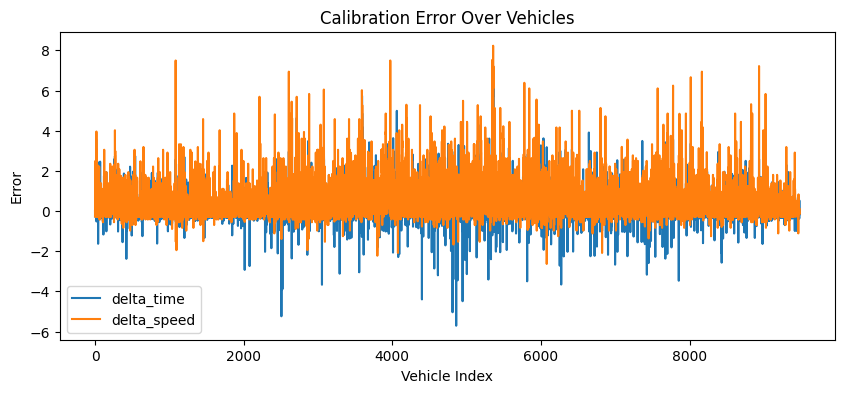

In [21]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['delta_time'], label='delta_time')
plt.plot(df.index, df['delta_speed'], label='delta_speed')
plt.xlabel('Vehicle Index')
plt.ylabel('Error')
plt.title('Calibration Error Over Vehicles')
plt.legend()
plt.show()

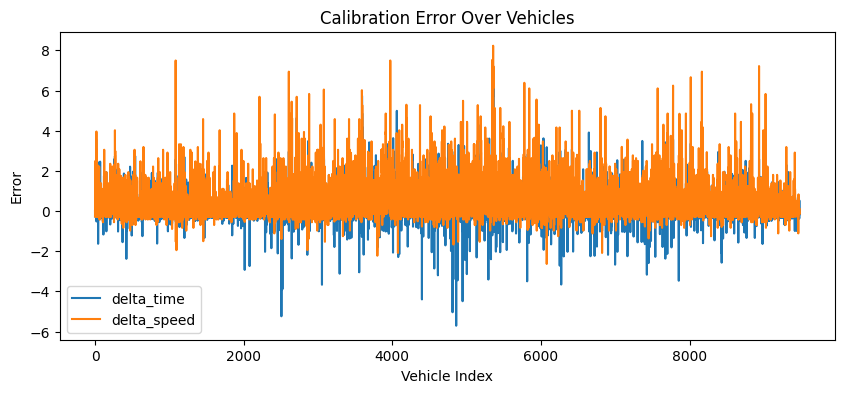

In [22]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['delta_time'], label='delta_time')
plt.plot(df.index, df['delta_speed'], label='delta_speed')
plt.xlabel('Vehicle Index')
plt.ylabel('Error')
plt.title('Calibration Error Over Vehicles')
plt.legend()
plt.show()

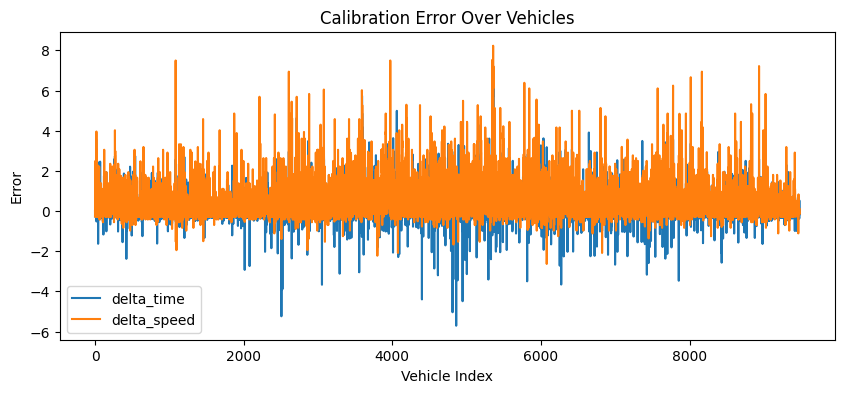

In [23]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['delta_time'], label='delta_time')
plt.plot(df.index, df['delta_speed'], label='delta_speed')
plt.xlabel('Vehicle Index')
plt.ylabel('Error')
plt.title('Calibration Error Over Vehicles')
plt.legend()
plt.show()

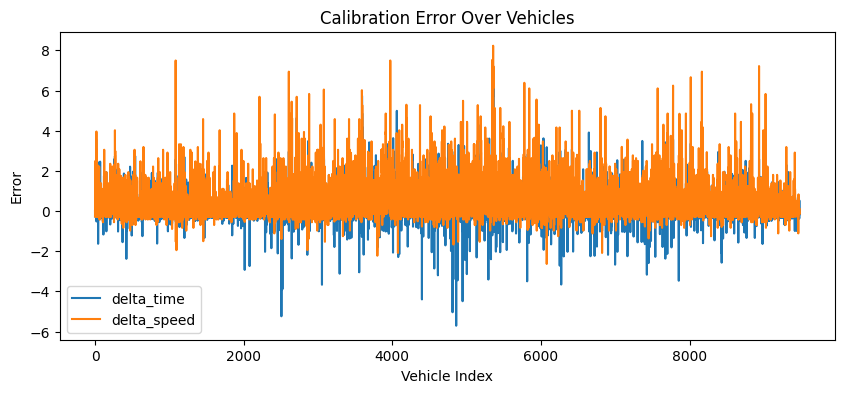

In [24]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['delta_time'], label='delta_time')
plt.plot(df.index, df['delta_speed'], label='delta_speed')
plt.xlabel('Vehicle Index')
plt.ylabel('Error')
plt.title('Calibration Error Over Vehicles')
plt.legend()
plt.show()

4. Correlation Matrix

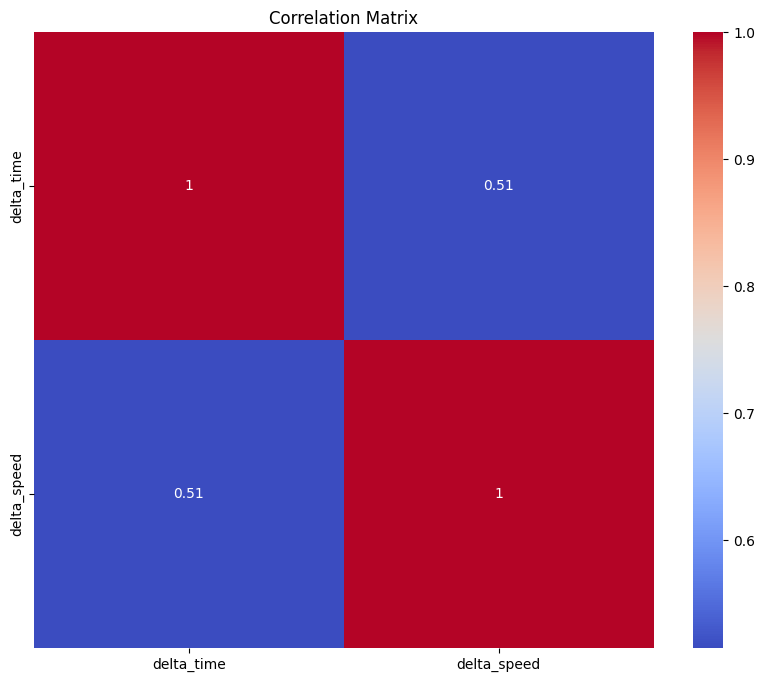

In [25]:
corr = df[["delta_time","delta_speed"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

5. Outlier Detection


In [26]:
for col in error_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    print(f"Number of outliers in {col}: {len(outliers)}")
    display(outliers[[col]].head())

Number of outliers in delta_time: 807


,delta_time
5,1.57
16,3.57
17,2.28
22,1.57
24,2.73


Number of outliers in delta_speed: 560


,delta_speed
5,2.496333
19,3.960049
24,3.050222
124,3.052222
205,2.354946


6. Error by Speed Factor (if available)


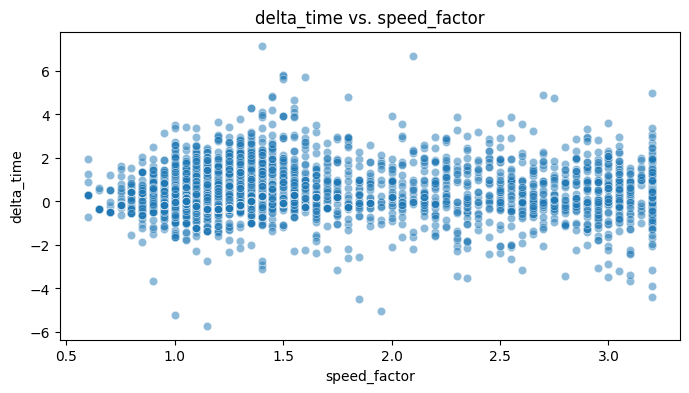

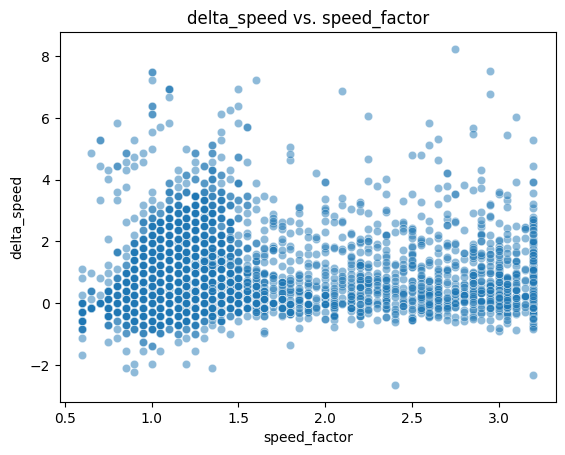

In [27]:
if 'speed_factor' in df.columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x='speed_factor', y='delta_time', data=df, alpha=0.5)
    plt.title('delta_time vs. speed_factor')
    plt.show()
    sns.scatterplot(x='speed_factor', y='delta_speed', data=df, alpha=0.5)
    plt.title('delta_speed vs. speed_factor')
    plt.show()

7. Summary Table of Top N Largest Errors

In [28]:
N = 10
df['time_detector_sim'] = df['time_detector_sim'].apply(int)
print("Top N largest delta_time errors:")
display(df.nlargest(N, 'delta_time')[['veh_id', 'delta_speed', 'delta_time', 'time_detector_real', 'time_detector_sim']])
print("Top N largest delta_speed errors:")
display(df.nlargest(N, 'delta_speed')[['veh_id', 'delta_time', 'delta_speed', 'speed_detector_real', 'speed_detector_sim']])

Top N largest delta_time errors:


,veh_id,delta_speed,delta_time,time_detector_real,time_detector_sim
5358,5358_e2w_in,6.106446,7.16,1577975611,1577975618
5360,5360_e2w_in,6.876091,6.70,1577975614,1577975620
5356,5356_e2w_in,5.828333,5.83,1577975608,1577975613
3593,3593_e2w_in,4.717222,5.74,1577966832,1577966837
5359,5359_e2w_in,7.216889,5.70,1577975612,1577975617
5361,5361_e2w_in,6.939444,5.62,1577975617,1577975622
4061,4061_e2w_in,1.760834,4.99,1577969310,1577969314
5353,5353_e2w_in,2.883601,4.88,1577975605,1577975609
3595,3595_e2w_in,3.467389,4.86,1577966837,1577966841
5355,5355_e2w_in,5.058634,4.80,1577975607,1577975611


Top N largest delta_speed errors:


,veh_id,delta_time,delta_speed,speed_detector_real,speed_detector_sim
5357,5357_e2w_in,4.77,8.231639,5.000000,13.231639
5346,5346_e2w_in,-1.21,7.529252,3.611111,11.140363
1085,1085_e2w_in,2.57,7.496667,0.833333,8.330000
3973,3973_e2w_in,2.42,7.496667,0.833333,8.330000
8935,8935_e2w_in,2.59,7.218889,1.111111,8.330000
5359,5359_e2w_in,5.70,7.216889,6.111111,13.328000
2607,2607_e2w_in,1.78,6.940778,2.222222,9.163000
2608,2608_e2w_in,2.96,6.940778,2.222222,9.163000
8166,8166_e2w_in,2.03,6.940776,2.222222,9.162999
5361,5361_e2w_in,5.62,6.939444,5.555556,12.495000


8. Save Plots to Disk


In [29]:
plt.figure(figsize=(8,4))
df['delta_time'].hist(bins=30)
plt.title('Histogram of delta_time')
plt.xlabel('delta_time')
plt.ylabel('Frequency')
plt.savefig('delta_time_histogram.png')
plt.close()